CNN Classification Project Exercise3 which is to predict the Price of two Fruits Class

In [1]:
# this exercise begins by
# importing all the necessary 
# libraries
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# 
# if your Jupyter kernel dies after training
# this can help to fix it
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

 The two datasets are loaded and then combine together using concat() into one DataFrame

I initally use two datasets I found in Kaggle.com but I noticed didn't have the two variables to work it.
So I had to use another dataset, though not so many rows, together is about 500+ rows which I think might affect the accuracy of the model.

In [2]:
# Also! I did reset the index
# the dataset is loaded
df = pd.read_csv("prices.csv")
df = df.reset_index()

In [3]:
# then read the DataFrame
# dataset has 287 rows and 12 columns
df

,index,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


In [4]:
df.describe()

,index,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,143.000000,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,82.993976,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,0.000000,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,71.500000,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,143.000000,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,214.500000,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,286.000000,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [5]:
# I need to drop these columns 
# as I took my time to go through the 
# rows value to know the best
# variables to work with
df = df.drop(["Bhindi (Ladies finger)" , "Onion", "Tomato", "Potato", "Brinjal", "Peas", "Methi", "Elephant Yam (Suran)"], axis=1)

In [6]:
# this left with these two variables
# Garlic and Green Chilli
df.head()

,index,Price Dates,Garlic,Green Chilli
0,0,01-01-2023,50,45.0
1,1,02-01-2023,55,40.0
2,2,03-01-2023,55,40.0
3,3,04-01-2023,55,40.0
4,4,08-01-2023,55,35.0


In [7]:
#  here the Scale values set to 0.0 - 1.0 
# so that the values can be compared
# laterSmallest value = 0.0, highest value = 1.0
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
# and then scaling only the important variables
num_cols = ["Garlic", "Green Chilli"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [9]:
df.head()

,index,Price Dates,Garlic,Green Chilli
0,0,01-01-2023,0.000000,0.499277
1,1,02-01-2023,0.020833,0.443641
2,2,03-01-2023,0.020833,0.443641
3,3,04-01-2023,0.020833,0.443641
4,4,08-01-2023,0.020833,0.388005


In [10]:
# starting 1 until the final row
# also the Price Dates and index
# are dropped 
# then using the sequence number
# starting from 1 till the final row
df["sequence"] = df.index + 1
df = df.drop(["Price Dates", "index"], axis=1)

In [11]:
df.describe()

,Garlic,Green Chilli,sequence
count,287.000000,287.000000,287.000000
mean,0.346254,0.489512,144.000000
std,0.250326,0.142390,82.993976
min,0.000000,0.000000,1.000000
25%,0.145833,0.388005,72.500000
50%,0.291667,0.443641,144.000000
75%,0.479167,0.554913,215.500000
max,1.000000,1.000000,287.000000


In [12]:
# the sequence numbers 
# are correct order!
df.tail()

,Garlic,Green Chilli,sequence
282,0.875000,0.443641,283
283,0.875000,0.499277,284
284,0.875000,0.554913,285
285,0.833333,0.554913,286
286,0.875000,0.666184,287


In [13]:
# I set the sequence number, Garlic and Green Chilli
# in the DataFrame 
df = pd.melt(df, id_vars=["sequence"], value_vars=["Garlic", "Green Chilli"],
             var_name="class", value_name="price")

In [14]:
df.head()

,sequence,class,price
0,1,Garlic,0.000000
1,2,Garlic,0.020833
2,3,Garlic,0.020833
3,4,Garlic,0.020833
4,5,Garlic,0.020833


In [15]:
# about 287 data points for Garlic
# and same for Green Chilli
df[df['class'] == "Garlic"]

,sequence,class,price
0,1,Garlic,0.000000
1,2,Garlic,0.020833
2,3,Garlic,0.020833
3,4,Garlic,0.020833
4,5,Garlic,0.020833
...,...,...,...
282,283,Garlic,0.875000
283,284,Garlic,0.875000
284,285,Garlic,0.875000
285,286,Garlic,0.833333


In [16]:
# and same data points for Green Chilli as well
df[df['class'] == "Green Chilli"]

,sequence,class,price
287,1,Green Chilli,0.499277
288,2,Green Chilli,0.443641
289,3,Green Chilli,0.443641
290,4,Green Chilli,0.443641
291,5,Green Chilli,0.388005
...,...,...,...
569,283,Green Chilli,0.443641
570,284,Green Chilli,0.499277
571,285,Green Chilli,0.554913
572,286,Green Chilli,0.554913


In [17]:
# now I create classes for the 
# values => 0 or 1,
# two variables 
# to the target output variables
df['class'] = df['class'].replace({"Garlic": 0, "Green Chilli": 1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_7112\1900814300.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({"Garlic": 0, "Green Chilli": 1})


In [18]:
# this is making look presentable
class_names = np.array(["Garlic", "Green Chilli"])
num_classes = len(class_names)
classes = [0, 1]

In [19]:
# the DataFrame is split into
# two separate DataFrames
# according to their 
# their target variable
df_class_1 = df[df['class'] == 0]
df_class_2 = df[df['class'] == 1]

# combine into a list for easier iteration
# WHEN WE DO THE TIMESTEP SPLIT
splitted_dfs = [df_class_1, df_class_2]

In [20]:
# need to check that the Garlic
# still have the initial amount of data
df_class_1['class'].value_counts()

class
0    287
Name: count, dtype: int64

In [21]:
# need to check that the Green Chilli
# still have the initial amount of data
df_class_2['class'].value_counts()

class
1    287
Name: count, dtype: int64

In [22]:
df

,sequence,class,price
0,1,0,0.000000
1,2,0,0.020833
2,3,0,0.020833
3,4,0,0.020833
4,5,0,0.020833
...,...,...,...
569,283,1,0.443641
570,284,1,0.499277
571,285,1,0.554913
572,286,1,0.554913


 For each signal type, we have to split them into 50 point chunks and save them into a list

In [23]:

# I chose 250 because of the less points 
# I have in my dataset
# each variable is sepatrated into half
# Garlic 250 and Green Chilli 250
# the variables then save into
# the dictionnary 
# x_total and
# y_total
max_size = 250
time_step_size = 50

# x_total is going to be the price 
x_total = []
y_total = []

# built x_total and y_total for all categories 
for category in classes:
    # this cut the original signal data
    # starting from index 0
    index_cutoff = 0

    while index_cutoff / max_size < 1:
        timestep = []

        # take a slice of 50 points, starting from cutoff until cutoff + 50
        slice = splitted_dfs[category].iloc[index_cutoff:index_cutoff + time_step_size]
    
        # take a slice of selected category / signal type
        # and place it in x_total and y_total
        x_total.append(list(slice['price']))
        y_total.append(category)

        # after each slicing operation, increase the cutoff
        # by 50 (step size), otherwise we get an infinite
        index_cutoff += time_step_size

In [24]:
len(x_total)

10

In [25]:
len(y_total)

10

In [26]:
x_total[6]

[0.44364081450984755,
 0.44364081450984755,
 0.44364081450984755,
 0.44364081450984755,
 0.554912651607878,
 0.49927673305886283,
 0.49927673305886283,
 0.49927673305886283,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.554912651607878,
 0.44364081450984755,
 0.44364081450984755,
 0.44364081450984755,
 0.44364081450984755,
 0.554912651607878,
 0.44364081450984755,
 0.44364081450984755,
 0.44364081450984755,
 0.0,
 0.3880048959608323,
 0.554912651607878,
 0.554912651607878,
 0.3880048959608323,
 0.44364081450984755,
 0.3323689774118171,
 0.3323689774118171,
 0.44364081450984755,
 0.3323689774118171,
 0.3323689774118171,
 0.3323689774118171,
 0.3323689774118171,
 0.44364081450984755,
 0.35462334483142316,
 0.3323689774118171,
 0.35462334483142316,
 0.3323689774118171,
 0.3880048959608323,
 0.44364081450984755,
 0.

In [27]:
y_total[6]

1

In [28]:
len(x_total)

10

In [29]:
len(x_total[0])

50

In [30]:
# this computation comfirmed that each 
# variable are assigned equal samples
8 * 50

400

In [31]:
# the data is to be set randomly
# by the target variable, which is a problem for a neural network
# and then shuffle the data in other to 
# maintain the pairings between x_total and y_total
import random
zipped = list(zip(x_total, y_total))
random.shuffle(zipped)
x_total, y_total = zip(*zipped)

In [32]:
y_total[6]

1

In [33]:
# the x_total now converted into NumPy arrays
# same as y_total converted into NumPy arrays
x_total = np.array(x_total)
y_total = np.array(y_total)

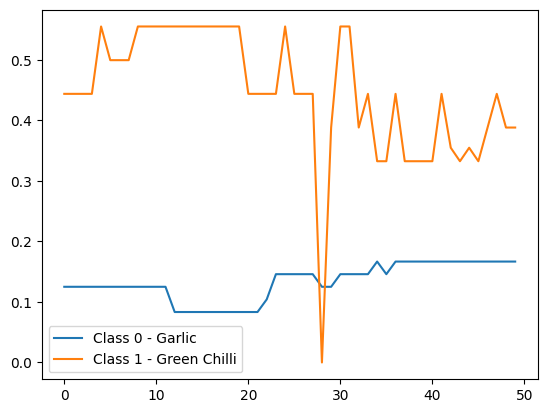

In [34]:
# this cell visualize pairs of signals just for testing 
# and I chosen the index 4 in this case
test_signal_index = 2

c_x_train = x_total[y_total == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0 - Garlic")

c_x_train = x_total[y_total == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1 - Green Chilli")
plt.legend()

In [35]:
# let's make a helper variable to split our dataset
# by efficiently partitions the dataset into training and testing sets
# 70% allocated for the training 
# and 30% for the test
# Then calculate the index at which to split the dataset based on the selection
# and then assigns the remaining samples from x_total 
# this is carried out after the splitter index to the testing set -x_test
train_size = 0.7
splitter = int(len(x_total) * train_size)

# split by the index
x_train = x_total[0:splitter]
x_test = x_total[splitter:]
y_train = y_total[0:splitter]
y_test = y_total[splitter:]

In [36]:
x_train

array([[0.        , 0.02083333, 0.02083333, 0.02083333, 0.02083333,
        0.02083333, 0.0625    , 0.0625    , 0.0625    , 0.0625    ,
        0.0625    , 0.0625    , 0.0625    , 0.0625    , 0.0625    ,
        0.0625    , 0.0625    , 0.0625    , 0.0625    , 0.0625    ,
        0.0625    , 0.0625    , 0.0625    , 0.0625    , 0.0625    ,
        0.0625    , 0.0625    , 0.125     , 0.125     , 0.04166667,
        0.125     , 0.125     , 0.125     , 0.125     , 0.125     ,
        0.125     , 0.125     , 0.14583333, 0.14583333, 0.14583333,
        0.14583333, 0.14583333, 0.14583333, 0.14583333, 0.14583333,
        0.14583333, 0.125     , 0.125     , 0.125     , 0.125     ],
       [0.83309224, 0.77745633, 0.77745633, 0.77745633, 0.77745633,
        1.        , 0.88872816, 0.88872816, 0.88872816, 0.77745633,
        0.77745633, 0.66618449, 0.66618449, 0.66618449, 0.77745633,
        0.55491265, 0.55491265, 0.55491265, 0.55491265, 0.55491265,
        0.44364081, 0.44364081, 0.55491265, 0.6

In [37]:
# reshpaing the data to match requirements of the CNN network
#  reshaping the input data to 
# match the requirements of the
# convolutional neural network (CNN) architecture.
# reshaping the training data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [38]:
# the data format AFTER reshaping!
# note: one more level (dimension) of list added!
x_train

array([[[0.        ],
        [0.02083333],
        [0.02083333],
        [0.02083333],
        [0.02083333],
        [0.02083333],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.0625    ],
        [0.125     ],
        [0.125     ],
        [0.04166667],
        [0.125     ],
        [0.125     ],
        [0.125     ],
        [0.125     ],
        [0.125     ],
        [0.125     ],
        [0.125     ],
        [0.14583333],
        [0.14583333],
        [0.14583333],
        [0.14583333],
        [0.14583333],
        [0.14583333],
        [0.14583333],
        [0.14583333],
        [0

Building the model

In [39]:
# i did optimize the model 
# building the model
def make_model(input_shape):
    model = keras.Sequential([
        keras.layers.Input(input_shape),
        keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu"),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(filters=128, kernel_size=3, padding="same", activation="relu"),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Dropout(0.5),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax")
    ])
    
    return model

model = make_model(input_shape=x_train.shape[1:])
#model = make_model(input_shape=x_train.shape[1:], num_classes=num_classes)



Training the Model 

In [40]:
epochs = 300
batch_size = 8

# useful callbacks typically for time series
# or CNN in general
# Define the optimizer
# Define the optimizer
# the loss is so low 
# while the val_loss is high 
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
]

# usual combination
# this example uses sparse categorical crossentropy
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)


# train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)


# in a nutshell, normal vs sparse
# normal is = [0, 1]
# sparse is = 0      (or 1)

Epoch 1/300


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.9942 - sparse_categorical_accuracy: 0.2000 - val_loss: 0.6804 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 0.5736 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.6508 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 0.3130 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.6287 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.3062 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.6093 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.5929 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.4699 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.5858 - val_sparse_categorical_accuracy: 1.0000
Epoch 7/300
1/1 ━━━━━━━━━

Metrics

<Axes: >

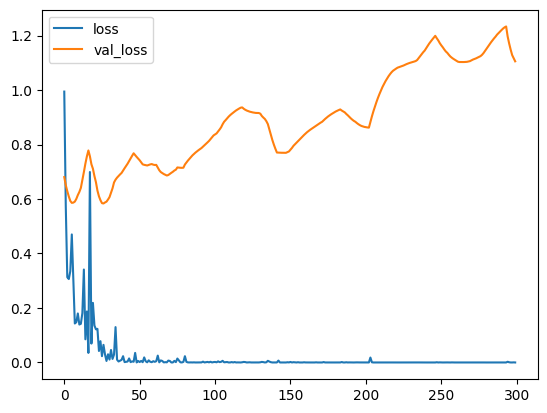

In [41]:
# plotting the metrics
# the loss and val_loss
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

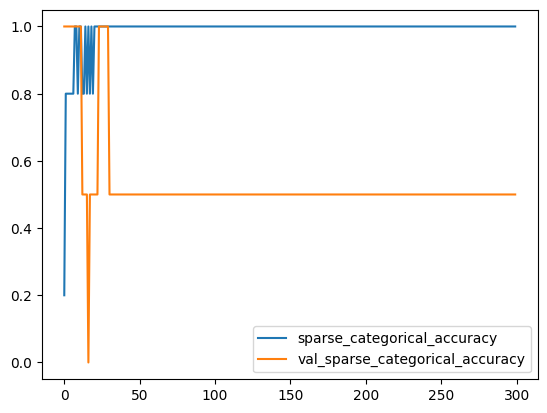

In [42]:
# the sparse_categorical_accuracy, and 
# val_sparse_categorical_accuracy
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()

In [43]:
# load up the best version of the model
# the model shows it will perform well
# by making correct general predictions
# as the test accuracy 
# and test loss values are close
model = keras.models.load_model("best_model.keras")

# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - loss: 0.6807 - sparse_categorical_accuracy: 0.6667
Test accuracy 0.6666666865348816
Test loss 0.68072509765625


In [44]:
# make predictions and use argmax
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


<Axes: >

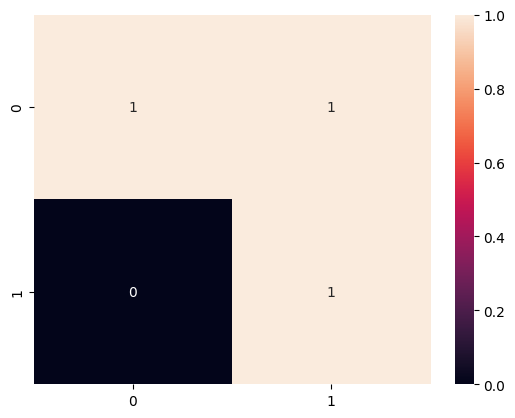

In [45]:
# confusion matrix
# there is minimal error

sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

In [46]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


Model overall accuracy: 66.67%


In [47]:
# roc auc score also very good
# that both the targeted variables or 
# samples are important 
# in making the predictions
# strangly I noticed each time
# run the whole notebook
# at some point the model accuracy 
# is 100% 
roc_auc_score(y_test, model.predict(x_test)[:, 1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


0.5

ChatGPT consultation

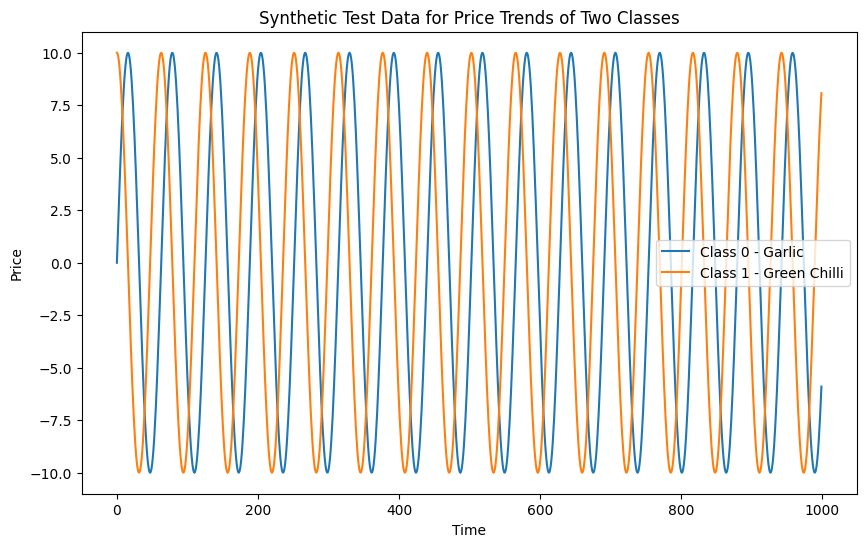

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# both the prices of the Garlic
# and Green Chilli
# increases and decreases almost
# same pattern
# although Green Chilli started high
# while Garlic started low
# however Garlic significantly drop low 
# while Green Chilli went high again 
# Define the trends for each class
def trend_class_0(x):
    return np.sin(x / 10) * 10

def trend_class_1(x):
    return np.cos(x / 10) * 10

# Generate x values (sequence)
x_values = np.arange(1000)

# Generate y values (price) for each class based on the defined trends
y_values_class_0 = trend_class_0(x_values)
y_values_class_1 = trend_class_1(x_values)

# Plot the generated test data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_class_0, label="Class 0 - Garlic")
plt.plot(x_values, y_values_class_1, label="Class 1 - Green Chilli")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Synthetic Test Data for Price Trends of Two Classes")
plt.legend()
plt.show()


In [49]:
# this is to enhance the model 
# to perform the function to select
# from the two samples or variable
# this helps the model to detect Garlic
# or Green Chilli
garlic_index = 2
greenchilli_index = 1

# make a prediction from test data, change the index in order
# to try another index
test_signal = np.expand_dims(x_test[greenchilli_index], axis=0)
result = model.predict(test_signal)
index = np.argmax(result)
print(result)
print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
[[0.47357002 0.5264301 ]]
Green Chilli


0
Garlic


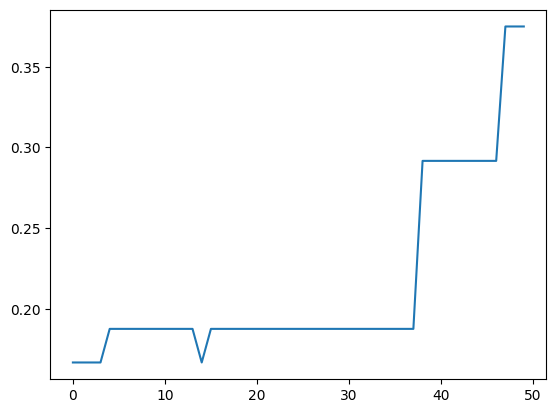

In [50]:
# plot the figure for this signal
price_index = 2
print(y_test[price_index])
print(class_names[y_test[price_index]])
plt.figure()
plt.plot(x_test[price_index])
plt.show()

# this is probably an okay test signal we can mimic
# with numpy data. the Garlic has a dip of values for the night time
# and otherwise steady increase or decrease

1
Green Chilli


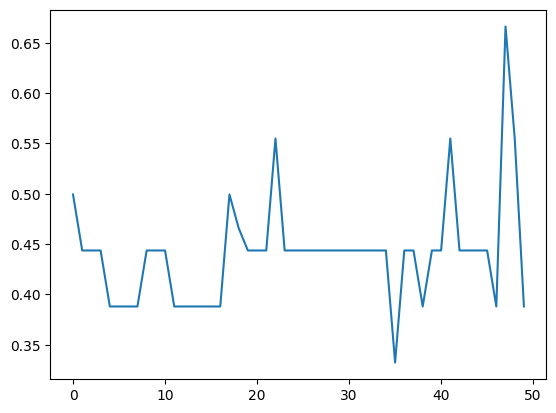

In [51]:
# plot the figure for this signal
price_index = 1
print(y_test[price_index])
print(class_names[y_test[price_index]])
plt.figure()
plt.plot(x_test[price_index])
plt.show()

# this is probably an okay test signal we can mimic
# with numpy data , this is wind_speed
# and it seems it has random fluctation with some spikes in the middle

<Axes: >

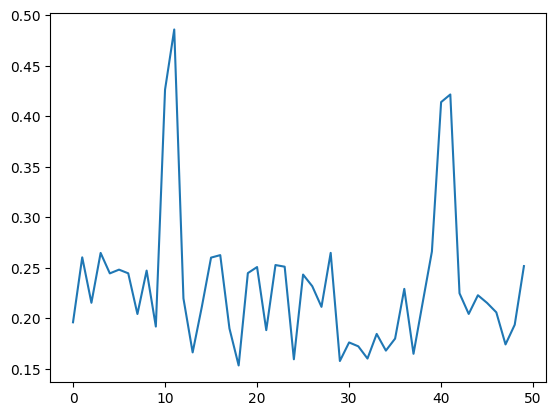

In [52]:
# this is a consultation from ChatGPT

# Generate x values from 0 to 49
x_values = np.arange(50)

# Generate y values fluctuating between 0.15 and 0.25
y_values = np.random.uniform(0.15, 0.27, size=50)

# Insert spikes for y values towards 0.5
y_values[10:12] = 0.45  # Spike 1, centered around index 10, 5 points wide
y_values[40:42] = 0.45 # Spike 2, centered around index 40, 5 points wide

# Add small random fluctuation to the spikes
y_values[10:12] += np.random.uniform(-0.075, 0.075, size=2)
y_values[40:42] -= np.random.uniform(-0.075, 0.075, size=2)

# Ensure values stay within the range [0, 1]
y_values = np.clip(y_values, 0, 1)

# 
sns.lineplot(x=x_values, y=y_values)

In [53]:
points = y_values
test_signal = np.expand_dims(points, axis=1)
test_batch = np.array([test_signal])
# result = model.predict([x_test[12]])[0]
test_predict = model.predict(test_batch)

# print prediction results
print(test_predict)
index = np.argmax(test_predict)
print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.486162 0.513838]]
Green Chilli


<Axes: >

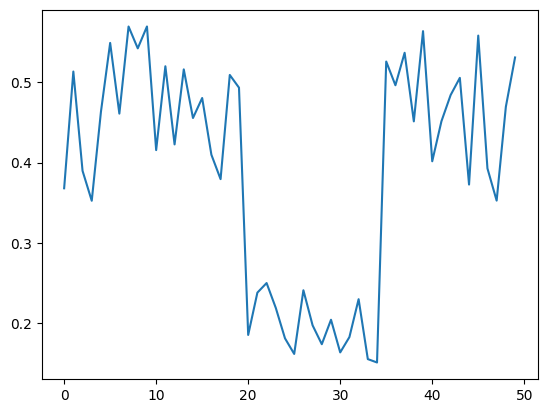

In [54]:


# Define the range of x-values
x = np.arange(50)

# Define the fluctuation ranges for y-values
y_min = 0.35
y_max = 0.57

# Create y-values with fluctuation
y = np.random.uniform(y_min, y_max, len(x))

# Create a pit in the y-values
pit_start = 20
pit_end = pit_start + 15
y[pit_start:pit_end] = np.random.uniform(0.15, 0.25, pit_end - pit_start)

sns.lineplot(x=x, y=y)


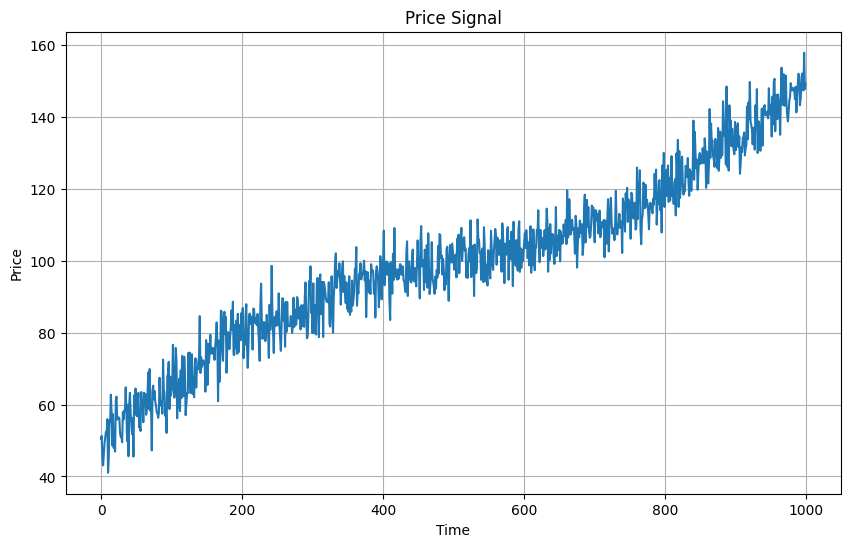

In [55]:
import numpy as np

# Define the parameters for the price signal
# the plot shows bith vegetables increases
# as time increases
num_samples = 1000  # Number of samples
trend = np.linspace(50, 150, num_samples)  # Linear trend
seasonality = 10 * np.sin(np.linspace(0, 2*np.pi, num_samples))  # Seasonal component
noise = np.random.normal(0, 5, num_samples)  # Random noise

# Generate the price signal
price_signal = trend + seasonality + noise

# Plot the price signal
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(price_signal)
plt.title('Price Signal')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [56]:
# ChatGPT -generated was used to test signal that mimics a price signal
points = y
test_signal = np.expand_dims(points, axis=1)
test_batch = np.array([test_signal])
# result = model.predict([x_test[12]])[0]
test_predict = model.predict(test_batch)

# print prediction results
print(test_predict)
index = np.argmax(test_predict)
print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.46023723 0.53976274]]
Green Chilli
